In [1]:
#Import necessary processing and machine learning libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

import mne
from mne.channels import make_standard_montage, DigMontage

pd.set_option('display.max_columns',None)

In [2]:
raw = mne.io.read_raw_edf('PN00-1.edf', preload=True)

Extracting EDF parameters from d:\projects\doctor\PN00-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1343999  =      0.000 ...  2624.998 secs...


C:\Users\PC\AppData\Local\Temp\ipykernel_4708\2946530773.py:1: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf('PN00-1.edf', preload=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_4708\2946530773.py:1: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf('PN00-1.edf', preload=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_4708\2946530773.py:1: RuntimeWarning: Highpass cutoff frequency 15.91549 is greater than lowpass cutoff frequency 15.0, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf('PN00-1.edf', preload=True)


In [4]:
#inspect the channel names
raw.info['ch_names']

['EEG Fp1',
 'EEG F3',
 'EEG C3',
 'EEG P3',
 'EEG O1',
 'EEG F7',
 'EEG T3',
 'EEG T5',
 'EEG Fc1',
 'EEG Fc5',
 'EEG Cp1',
 'EEG Cp5',
 'EEG F9',
 'EEG Fz',
 'EEG Cz',
 'EEG Pz',
 'EEG Fp2',
 'EEG F4',
 'EEG C4',
 'EEG P4',
 'EEG O2',
 'EEG F8',
 'EEG T4',
 'EEG T6',
 'EEG Fc2',
 'EEG Fc6',
 'EEG Cp2',
 'EEG Cp6',
 'EEG F10',
 'EKG EKG',
 'SPO2',
 'HR',
 '1',
 '2',
 'MK']

In [7]:
channels = [
    'EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 'EEG T3',
    'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 'EEG F9', 'EEG Fz',
    'EEG Cz', 'EEG Pz', 'EEG Fp2', 'EEG F4', 'EEG C4', 'EEG P4', 'EEG O2',
    'EEG F8', 'EEG T4', 'EEG T6', 'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6',
    'EEG F10', 'EKG EKG', 'SPO2', 'HR', '1', '2', 'MK'
]

# Remove the 'EEG' prefix
rename_mapping = {ch: ch.replace('EEG ', '') for ch in channels if ch.startswith('EEG ')}

raw.rename_channels(rename_mapping)

raw.info['ch_names']


['Fp1',
 'F3',
 'C3',
 'P3',
 'O1',
 'F7',
 'T3',
 'T5',
 'Fc1',
 'Fc5',
 'Cp1',
 'Cp5',
 'F9',
 'Fz',
 'Cz',
 'Pz',
 'Fp2',
 'F4',
 'C4',
 'P4',
 'O2',
 'F8',
 'T4',
 'T6',
 'Fc2',
 'Fc6',
 'Cp2',
 'Cp6',
 'F10',
 'EKG EKG',
 'SPO2',
 'HR',
 '1',
 '2',
 'MK']

In [11]:
#Drop unnecessary channel names
channels = ['EKG EKG', 'SPO2', 'HR', '1', '2', 'MK']

raw.drop_channels(channels)

<RawEDF | PN00-1.edf, 29 x 1344000 (2625.0 s), ~297.4 MB, data loaded>

In [12]:
# Map old channel names to standard channel names
rename_dict = {
    'Fc1': 'FC1',
    'Fc5': 'FC5',
    'Cp1': 'CP1',
    'Cp5': 'CP5',
    'Fc2': 'FC2',
    'Fc6': 'FC6',
    'Cp2': 'CP2',
    'Cp6': 'CP6'
}

raw.rename_channels(rename_dict)


<RawEDF | PN00-1.edf, 29 x 1344000 (2625.0 s), ~297.4 MB, data loaded>

In [13]:
easy_cap = make_standard_montage('standard_1020')
raw.set_montage(easy_cap)

<RawEDF | PN00-1.edf, 29 x 1344000 (2625.0 s), ~297.4 MB, data loaded>

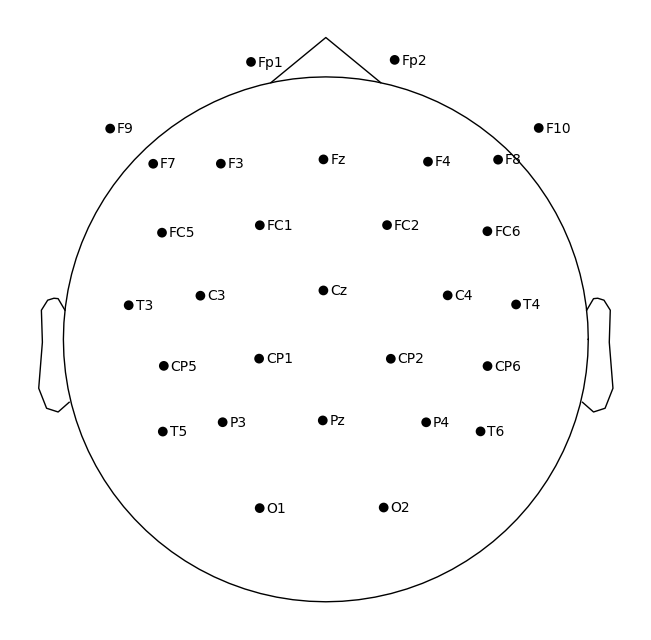

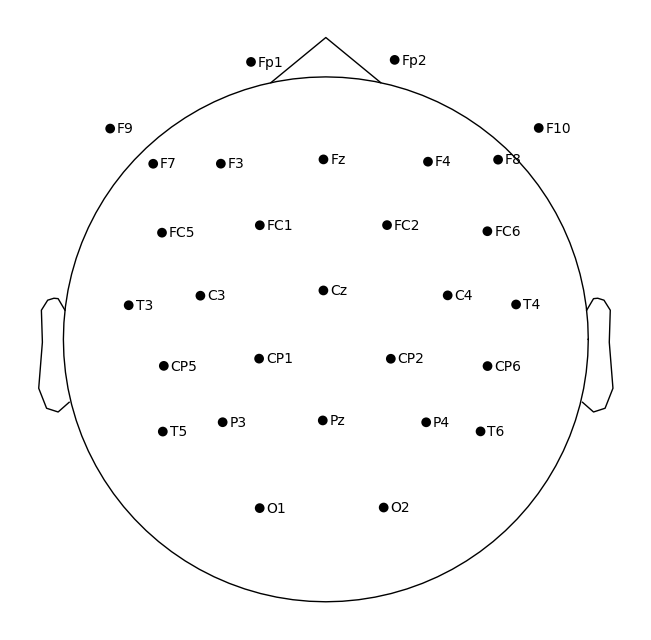

In [14]:
raw.plot_sensors(show_names=True)

In [5]:
montage = mne.channels.make_standard_montage('standard_1020')
montage.ch_names

['Fp1',
 'Fpz',
 'Fp2',
 'AF9',
 'AF7',
 'AF5',
 'AF3',
 'AF1',
 'AFz',
 'AF2',
 'AF4',
 'AF6',
 'AF8',
 'AF10',
 'F9',
 'F7',
 'F5',
 'F3',
 'F1',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'F10',
 'FT9',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'FCz',
 'FC2',
 'FC4',
 'FC6',
 'FT8',
 'FT10',
 'T9',
 'T7',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'T10',
 'TP9',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'CPz',
 'CP2',
 'CP4',
 'CP6',
 'TP8',
 'TP10',
 'P9',
 'P7',
 'P5',
 'P3',
 'P1',
 'Pz',
 'P2',
 'P4',
 'P6',
 'P8',
 'P10',
 'PO9',
 'PO7',
 'PO5',
 'PO3',
 'PO1',
 'POz',
 'PO2',
 'PO4',
 'PO6',
 'PO8',
 'PO10',
 'O1',
 'Oz',
 'O2',
 'O9',
 'Iz',
 'O10',
 'T3',
 'T5',
 'T4',
 'T6',
 'M1',
 'M2',
 'A1',
 'A2']